# Assignment 1

# 1. Data 취득

교육 여건과 부동산 가격의 상관관계를 파악하기 위해 아래와 같은 데이터를 이용하였다.

### 1) <B>교육 여건 관련 지표</B>: 인구 천 명 당 사설학원 수
  - 출처: 통계지리정보서비스 (https://sgis.kostat.go.kr) <br>
  - 원출처: 행정안전부 주민등록인구현황, 각시도 통계연보 <br>


### 2) <B>부동산 가격 관련 지표</B>: 2018년 8월 아파트 평균 단위 매매가격
  - 출처: 한국감정원 (http://r-one.co.kr/rone/resis/statistics/statisticsViewer.do?menuId=HOUSE_21121&autoExec=Y)


In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

train_data = np.genfromtxt('assignment01_train.csv', delimiter=',')
test_data = np.genfromtxt('assignment01_test.csv', delimiter=',')

# training data
X = train_data[:, 0]
Y = train_data[:, 1]

ndata_tr = len(X)

# normalization
xmin = min(X)
xmax = max(X)
X_ = (X - xmin) / (xmax - xmin)

ymin = min(Y)
ymax = max(Y)
Y_ = (Y - ymin) / (ymax - ymin)

# 2. Linear Regression

## 2.1 Gradient Descent Method

### 2.1.1 Training

training loss:  0.023063436563


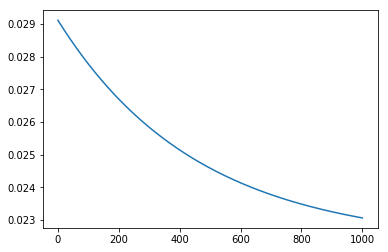

In [2]:
# initailize weight and bias for linear regression
w = 0.6
b = 0

alpha = 0.001  # learning rate
epoch = 1000

err_history = []

for i in range(epoch):
    Y_pred = w*X_ + b
    Loss = 0.5 * (Y_ - Y_pred) ** 2
    mse = Loss.sum() / ndata_tr
    
    dLdw = (Y_pred - Y_) * X_
    dLdb = (Y_pred - Y_)
    dLdw_mean = dLdw.sum() / ndata_tr
    dLdb_mean = dLdb.sum() / ndata_tr
    
    w = w - alpha * dLdw_mean
    b = b - alpha * dLdb_mean
    
    err_history.append(mse)

    
# final training result
Y_pred = w*X_ + b
Loss = 0.5 * (Y_ - Y_pred) ** 2
mse = Loss.sum() / ndata_tr
err_history.append(mse)

print('training loss: ', mse) # print the last mean square error
plt.plot(err_history)


### 2.1.2 Test

test loss:  0.0201721030553
weight:  0.615539896844
bias:  0.0725886879816


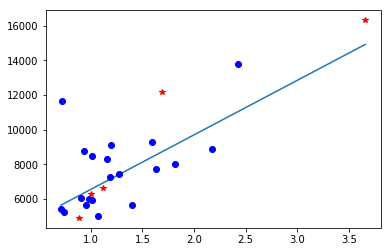

In [3]:
# test data
Xts = test_data[:, 0]
Yts = test_data[:, 1]

ndata_ts = len(Xts)

# normalization
Xts_ = (Xts - xmin) / (xmax - xmin)
Yts_ = (Yts - ymin) / (ymax - ymin)

Yts_pred = w*Xts_ + b
Loss = 0.5 * (Yts_ - Yts_pred) ** 2
mse = Loss.sum() / ndata_ts

print('test loss: ', mse)
print('weight: ', w)
print('bias: ', b)

# plot the linear regression result

xmax_overall = max(xmax, max(Xts))
xmin_overall = min(xmin, min(Xts))
X_lin = np.linspace(xmin_overall, xmax_overall, 50)
X_lin_ = (X_lin - xmin) / (xmax - xmin)
Y_lin_ = w*X_lin_ + b
Y_lin = Y_lin_ * (ymax - ymin) + ymin

plt.plot(X_lin, Y_lin)
plt.plot(X, Y, 'ob')
plt.plot(Xts, Yts, '*r')

## 2.2 Accelerated Optimization (ADAM)

### 2.2.1 Training

ADAM optimization 방법을 사용

training loss:  0.0218470501126


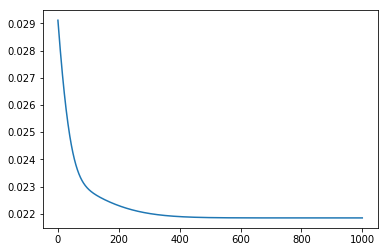

In [4]:
# initailize weight and bias for linear regression
w = 0.6
b = 0

alpha = 0.001  # learning rate
epoch = 1000

m = np.array([0, 0])  # momentum
v = np.array([0, 0])  # RMSProp

beta1 = 0.9    # for momentum
beta2 = 0.999  # for RMSProp
e = 1E-8

err_history = []

for i in range(epoch):
    Y_pred = w*X_ + b
    Loss = 0.5 * (Y_ - Y_pred) ** 2
    mse = Loss.sum() / ndata_tr
    
    dLdw = (Y_pred - Y_) * X_
    dLdb = (Y_pred - Y_)
    dLdw_mean = dLdw.sum() / ndata_tr
    dLdb_mean = dLdb.sum() / ndata_tr
    
    grad = np.array([dLdw_mean, dLdb_mean])
    
    # update momentum
    m = beta1 * m + (1 - beta1) * grad
    
    # update RMSProp
    v = beta2 * v + (1 - beta2) * grad**2
    
    # unbias
    t = i + 1
    m_hat = m / (1 - beta1**t)
    v_hat = v / (1 - beta2**t)
    
    # update weights
    [w, b] = [w, b] - alpha / np.sqrt(v_hat + e) * m_hat
    
    err_history.append(mse)
    
# final training result
Y_pred = w*X_ + b
Loss = 0.5 * (Y_ - Y_pred) ** 2
mse = Loss.sum() / ndata_tr
err_history.append(mse)

print('training loss: ', mse) # print the last mean square error
plt.plot(err_history)

### 2.2.2 Test

test loss:  0.0268907569181
weight:  0.512001231251
bias:  0.145535181576


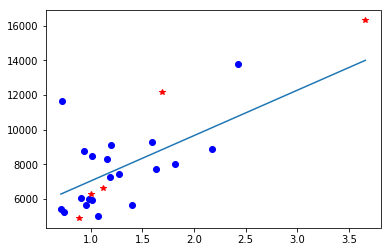

In [5]:
# test with the new w & b

Yts_pred = w*Xts_ + b
Loss = 0.5 * (Yts_ - Yts_pred) ** 2
mse = Loss.sum() / ndata_ts

print('test loss: ', mse)
print('weight: ', w)
print('bias: ', b)

# plot the linear regression result

xmax_overall = max(xmax, max(Xts))
xmin_overall = min(xmin, min(Xts))
X_lin = np.linspace(xmin_overall, xmax_overall, 50)
X_lin_ = (X_lin - xmin) / (xmax - xmin)
Y_lin_ = w*X_lin_ + b
Y_lin = Y_lin_ * (ymax - ymin) + ymin

plt.plot(X_lin, Y_lin)
plt.plot(X, Y, 'ob')
plt.plot(Xts, Yts, '*r')

# 3. Logistic Regression

## 3.1 Accelerated Optimization (ADAM)

### 3.1.1 Training

training loss:  0.0122562638126


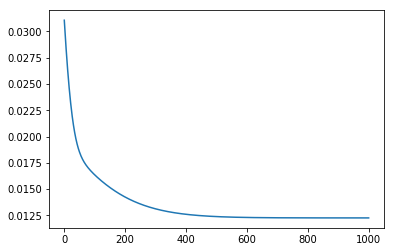

In [6]:
# normalization (redefine)
xmin = min(xmin, min(Xts))
xmax = max(xmax, max(Xts))
X_ = (X - xmin) / (xmax - xmin)

ymin = min(ymin, min(Yts))
ymax = max(ymax, max(Yts))
Y_ = (Y - ymin) / (ymax - ymin)

# initailize weight and bias for linear regression
w = 1
b = -0.5

alpha = 0.01  # learning rate
epoch = 1000

m = np.array([0, 0])  # momentum
v = np.array([0, 0])  # RMSProp

beta1 = 0.9    # for momentum
beta2 = 0.999  # for RMSProp
e = 1E-8

err_history = []

for i in range(epoch):
    Y_pred = 1 / (1 + np.exp(-1 * (w*X_ + b)))
    Loss = 0.5 * (Y_ - Y_pred) ** 2
    mse = Loss.sum() / ndata_tr
    
    dLdw = (Y_pred - Y_) * Y_pred * (1 - Y_pred) * X_
    dLdb = (Y_pred - Y_) * Y_pred * (1 - Y_pred)
    dLdw_mean = dLdw.sum() / ndata_tr
    dLdb_mean = dLdb.sum() / ndata_tr
    
    grad = np.array([dLdw_mean, dLdb_mean])
    
    # update momentum
    m = beta1 * m + (1 - beta1) * grad
    
    # update RMSProp
    v = beta2 * v + (1 - beta2) * grad**2
    
    # unbias
    t = i + 1
    m_hat = m / (1 - beta1**t)
    v_hat = v / (1 - beta2**t)
    
    # update weights
    [w, b] = [w, b] - alpha / np.sqrt(v_hat + e) * m_hat
    
    err_history.append(mse)
    
# final training result
Y_pred = 1 / (1 + np.exp(-1 * (w*X_ + b)))
Loss = 0.5 * (Y_ - Y_pred) ** 2
mse = Loss.sum() / ndata_tr
err_history.append(mse)

print('training loss: ', mse) # print the last mean square error
plt.plot(err_history)

### 3.1.2 Test

test loss:  0.0206477905304
weight:  3.68977207135
bias:  -1.90768074071


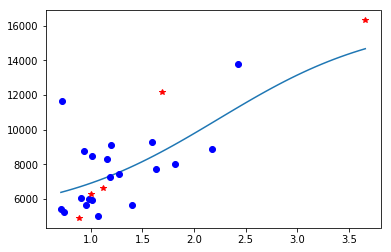

In [7]:
# test with the new w & b

Yts_pred = 1 / (1 + np.exp(-1 * (w*Xts_ + b)))
Loss = 0.5 * (Yts_ - Yts_pred) ** 2
mse = Loss.sum() / ndata_ts

print('test loss: ', mse)
print('weight: ', w)
print('bias: ', b)

# plot the linear regression result

xmax_overall = max(xmax, max(Xts))
xmin_overall = min(xmin, min(Xts))
X_log = np.linspace(xmin_overall, xmax_overall, 50)
X_log_ = (X_log - xmin) / (xmax - xmin)
Y_log_ = 1 / (1 + np.exp(-1 * (w*X_log_ + b)))
Y_log = Y_log_ * (ymax - ymin) + ymin

plt.plot(X_log, Y_log)
plt.plot(X, Y, 'ob')
plt.plot(Xts, Yts, '*r')